# ASSESSMENT 2

## **Build an ANN model for Drug classification.**

### This project aims to analyze the relationship between various medical parameters and drug effectiveness. The dataset consists of patient information, including age, sex, blood pressure levels (BP), cholesterol levels, sodium-to-potassium ratio (Na_to_K), drug type, and corresponding labels. The goal is to develop a model that can accurately predict the class or category of a given drug based on its features. 

####  **Import the libraries**

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mp

#### **Load the dataset**

In [2]:
dataset = pd.read_csv('drug.csv')

#### **Glimpse of the dataset**

In [3]:
dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Data Preprocessing

#### **Check for total no. of rows and column**

In [4]:
dataset.shape

(200, 6)

Total number of rows are 200 
Total number of columns are 6

#### **Check for missing values**

In [5]:
dataset.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

#### **Check for dataset information** 

In [6]:
dataset.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

#### **Check for statistical info**

In [7]:
dataset.describe

<bound method NDFrame.describe of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

#### **Let's Visualize in the Graph forms**

<AxesSubplot: xlabel='Drug', ylabel='count'>

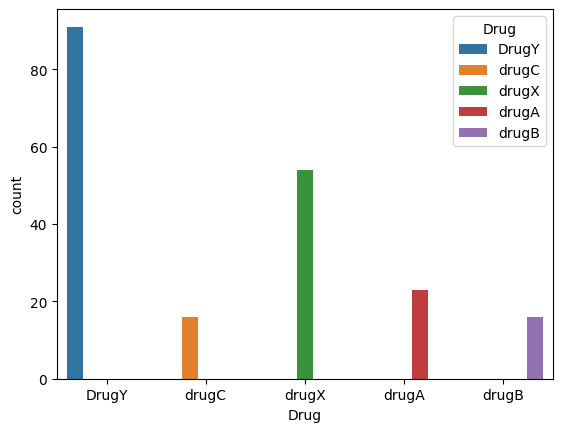

In [8]:
sb.countplot(x='Drug',data=dataset,hue='Drug')

Consumption of Drug Y is more and Drug B is less compare to all 

<AxesSubplot: xlabel='Sex', ylabel='count'>

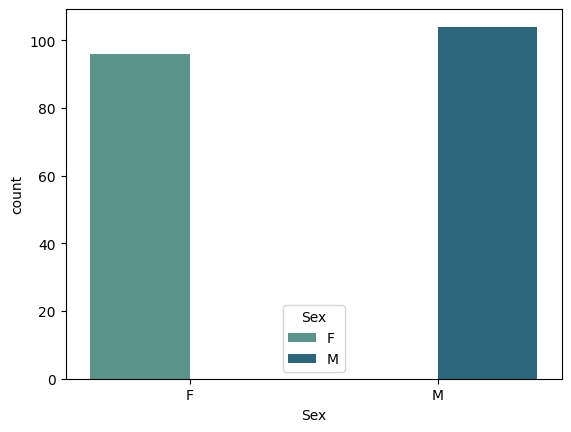

In [9]:
sb.countplot(x='Sex',data=dataset,palette='crest',hue='Sex')

Male Drug's consumption is more compare to Female 

<AxesSubplot: xlabel='Na_to_K', ylabel='Count'>

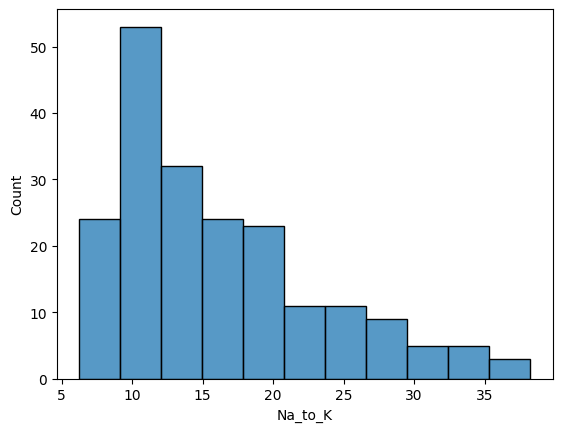

In [10]:
sb.histplot(x='Na_to_K',data=dataset)

#### **Segregate the data into train & test**

In [11]:
X = dataset.drop(columns = ['Drug'],axis=1)
Y = dataset['Drug']

Drug column is the output(target) column in this dataset.

In [12]:
Y_class = len(np.unique(Y))
print(Y_class)

5


The above code snippet will fetch the count of unique class value of the target column.

#### **Convert the Categorical data into interger data**

In [13]:
X = pd.get_dummies(X,columns=['Sex','BP','Cholesterol'],drop_first = True)

LE = LabelEncoder()
Y = LE.fit_transform(Y)

**get_dummies** is a pandas function which will convert the one-hot encoding categorical value into numeric value

**Labelencoder** will assign a numeric value to a category value.

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y,test_size=0.3,random_state=2)

In the above code snippet, I have divide the dataset into train and test

#### **Feature Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**StandardScaler** is used for scaling the numeric values

In [16]:
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

the to_categorical() function from the Keras library to convert the target variable arrays Y_train and Y_test into one-hot encoded arrays.

#### **create a ANN model**

In [17]:
model = Sequential()
model.add(Dense(48, input_dim=6, activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
output_layer = Dense(Y_class,activation='softmax')
model.add(output_layer)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                336       
                                                                 
 dense_1 (Dense)             (None, 36)                1764      
                                                                 
 dense_2 (Dense)             (None, 24)                888       
                                                                 
 dense_3 (Dense)             (None, 12)                300       
                                                                 
 dense_4 (Dense)             (None, 5)                 65        
                                                                 
Total params: 3,353
Trainable params: 3,353
Non-trainable params: 0
_________________________________________________________________


#### **compile the model**

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### **train the model**

In [19]:
model.fit(X_train,Y_train,epochs=48,batch_size=6)

Epoch 1/48
24/24 [==============================] - 1s 2ms/step - loss: 1.5547 - accuracy: 0.2929
Epoch 2/48
24/24 [==============================] - 0s 2ms/step - loss: 1.3912 - accuracy: 0.4214
Epoch 3/48
24/24 [==============================] - 0s 1ms/step - loss: 1.2214 - accuracy: 0.6429
Epoch 4/48
24/24 [==============================] - 0s 1ms/step - loss: 1.0234 - accuracy: 0.6643
Epoch 5/48
24/24 [==============================] - 0s 1ms/step - loss: 0.8249 - accuracy: 0.6714
Epoch 6/48
24/24 [==============================] - 0s 1ms/step - loss: 0.6538 - accuracy: 0.7500
Epoch 7/48
24/24 [==============================] - 0s 1ms/step - loss: 0.5144 - accuracy: 0.8071
Epoch 8/48
24/24 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.9286
Epoch 9/48
24/24 [==============================] - 0s 1ms/step - loss: 0.3025 - accuracy: 0.9786
Epoch 10/48
24/24 [==============================] - 0s 1ms/step - loss: 0.2323 - accuracy: 0.9786
Epoch 11/48
24/24 [

#### **evaluate the model on the test set**

In [20]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc * 100)

2/2 [==============================] - 0s 5ms/step - loss: 0.3741 - accuracy: 0.8833
Test accuracy: 88.33333253860474
